In [1]:
# !pip install pytrends

In [2]:
import pandas as pd

news = pd.read_csv('../data/news/noticias_sentimentos.csv')
news['Data'] = pd.to_datetime(news['Data'])
start = news['Data'].min().strftime('%Y-%m-%d')
end = news['Data'].max().strftime('%Y-%m-%d')
print(f'{start} - {end}')

2014-09-08 - 2024-09-08


In [3]:
tickers_df = pd.read_csv('../series_ibov/ivob_vol.csv')
tickers = tickers_df.columns[1:].str.replace('.SA', '').to_numpy()

In [4]:
from pytrends.request import TrendReq

pytrend = TrendReq(hl='pt-BR', retries=3)

In [5]:
kw_list = list(tickers.reshape(-1, 2))
kw_list = [list(map(str, sublist)) for sublist in kw_list]

dfs_interests = []
for ticker in kw_list:
    pytrend.build_payload(ticker, cat=0, timeframe=f'{start} {end}', geo='', gprop='')
    df = pytrend.interest_over_time()
    dfs_interests.append(df)

C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) 

In [6]:
df_join = pd.concat(dfs_interests, axis=1)
df_join.drop(columns='isPartial', inplace=True)

<Axes: xlabel='date'>

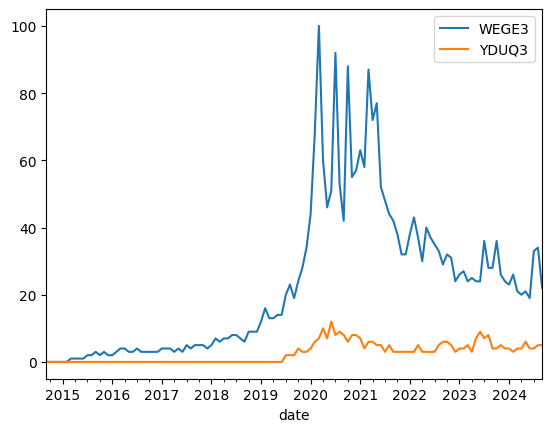

In [7]:
df.plot()